In [12]:
%matplotlib inline


In [13]:
import pandas as pd
import seaborn as sns
import pylab as plt
import calmap
bkg=pd.read_csv('../data/61aBangkok.csv', index_col=[-1], parse_dates=True)

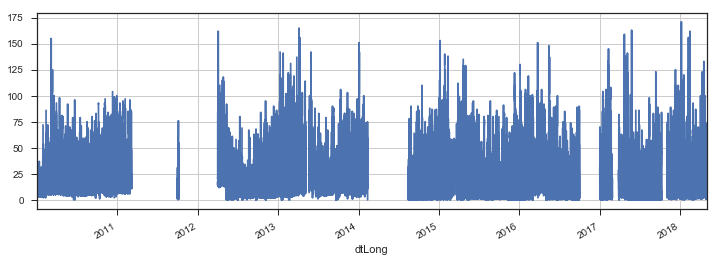

In [14]:
# Set major seaborn asthetics
plt.figure(figsize=(12,4))
sns.set("notebook", style='ticks', font_scale=1.0)
bkg['O3'].plot(grid=True)

In [15]:
bkgmean=bkg.groupby([(bkg.index.year),(bkg.index.month)]).mean()

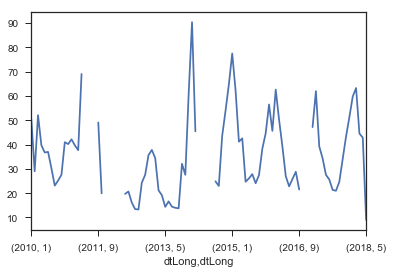

In [16]:
bkgmean['PM10'].plot()

In [17]:
# #plt.figure(figsize=(20,100), dpi=200)
# fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(8,16), dpi=200)
# plt.hold(True)
# counter=0
# for i in range(2010,2016):
#     print(i)
#     calmap.yearplot(bkg['O3'], year=i, ax=axes[counter], vmin=0., vmax=300.)
#     counter = counter+1
# plt.tight_layout

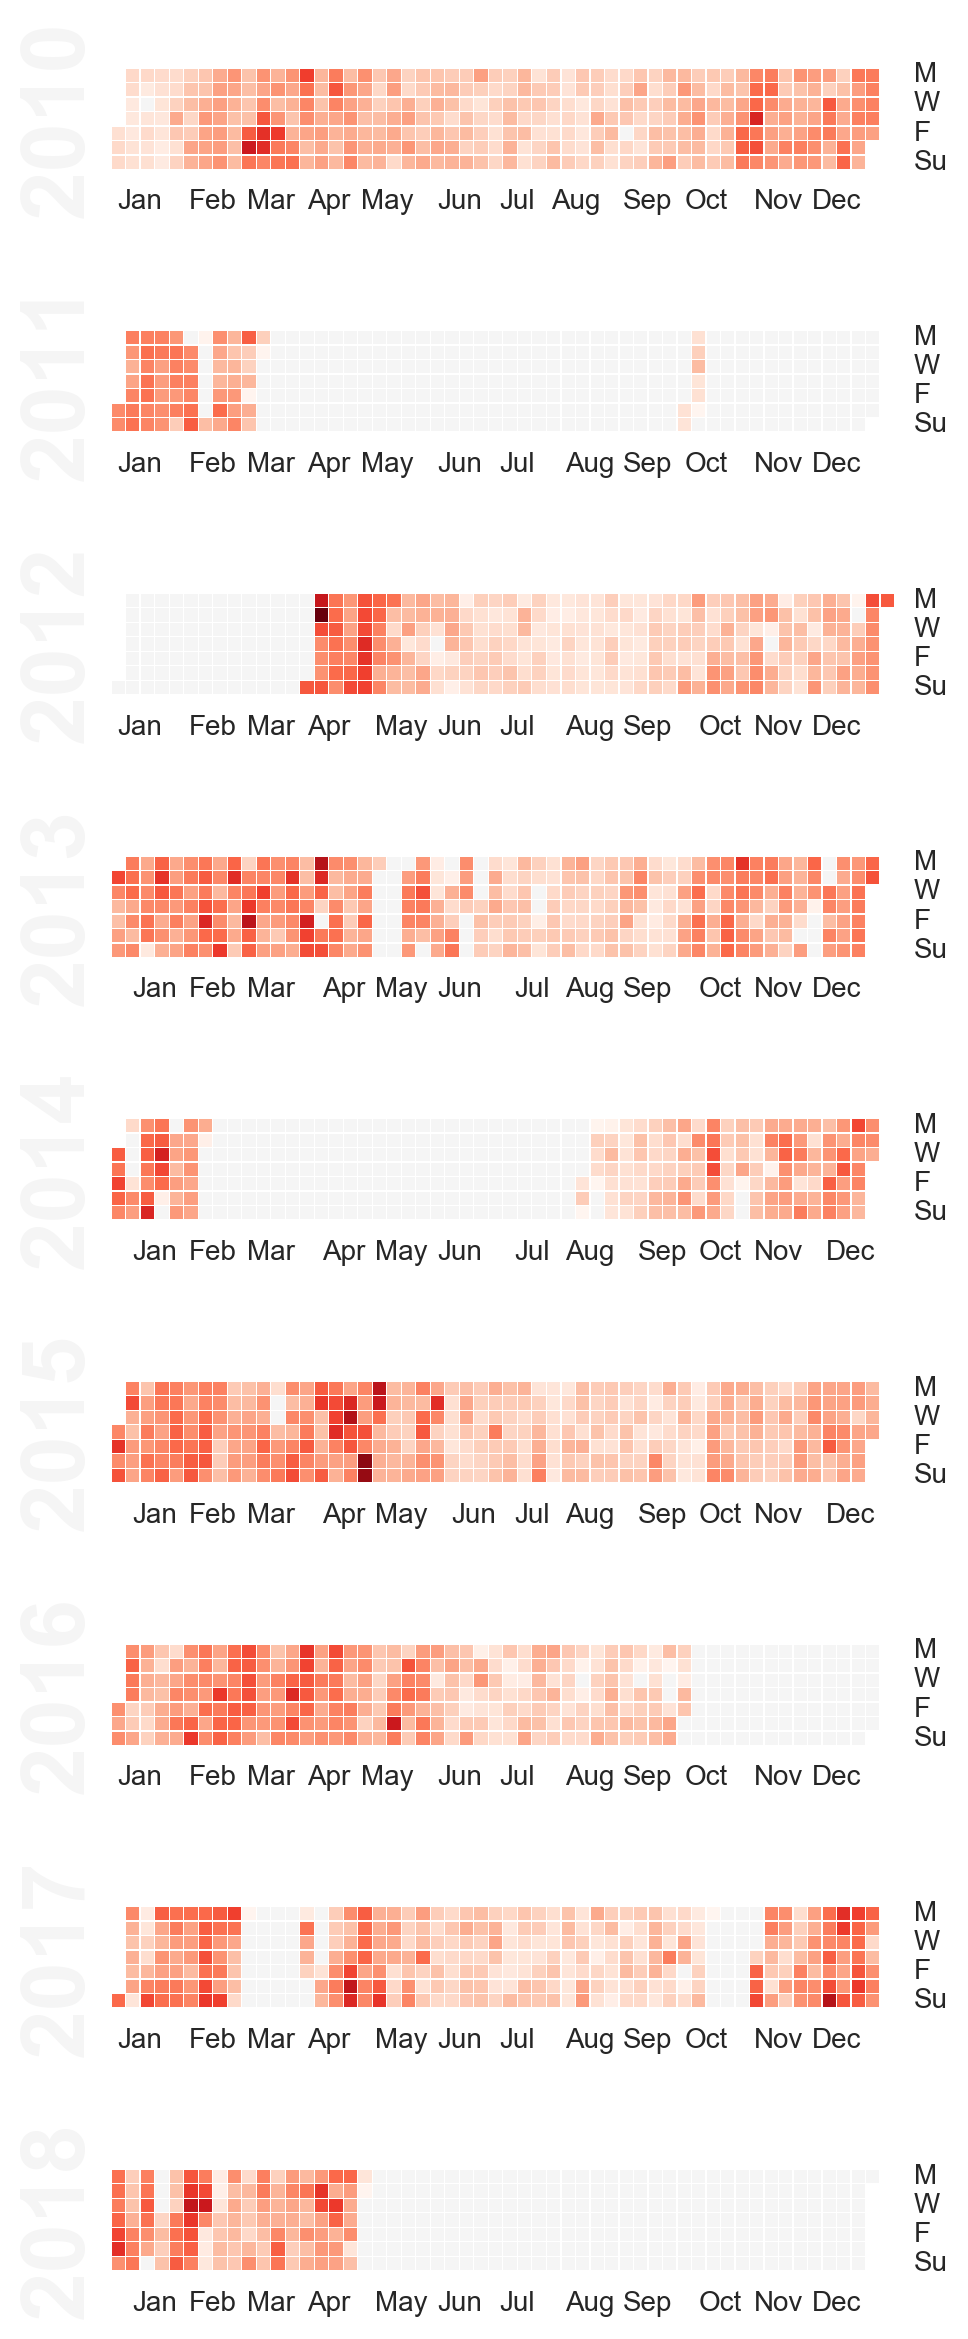

In [18]:
#fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,16), dpi=200)
calmap.calendarplot(bkg['O3'], vmin=0., fig_kws={'figsize':[5,12], 'dpi':200.}, yearlabels=True,  
                    daylabels=['M', 'Tu', 'W', 'Th', 'F', 'Sa', 'Su'], 
                    dayticks=[0, 2, 4, 6], cmap='Reds',
                    linewidth=0.1)#fillcolor='white'
plt.savefig('../figures/O3_calplot.png')

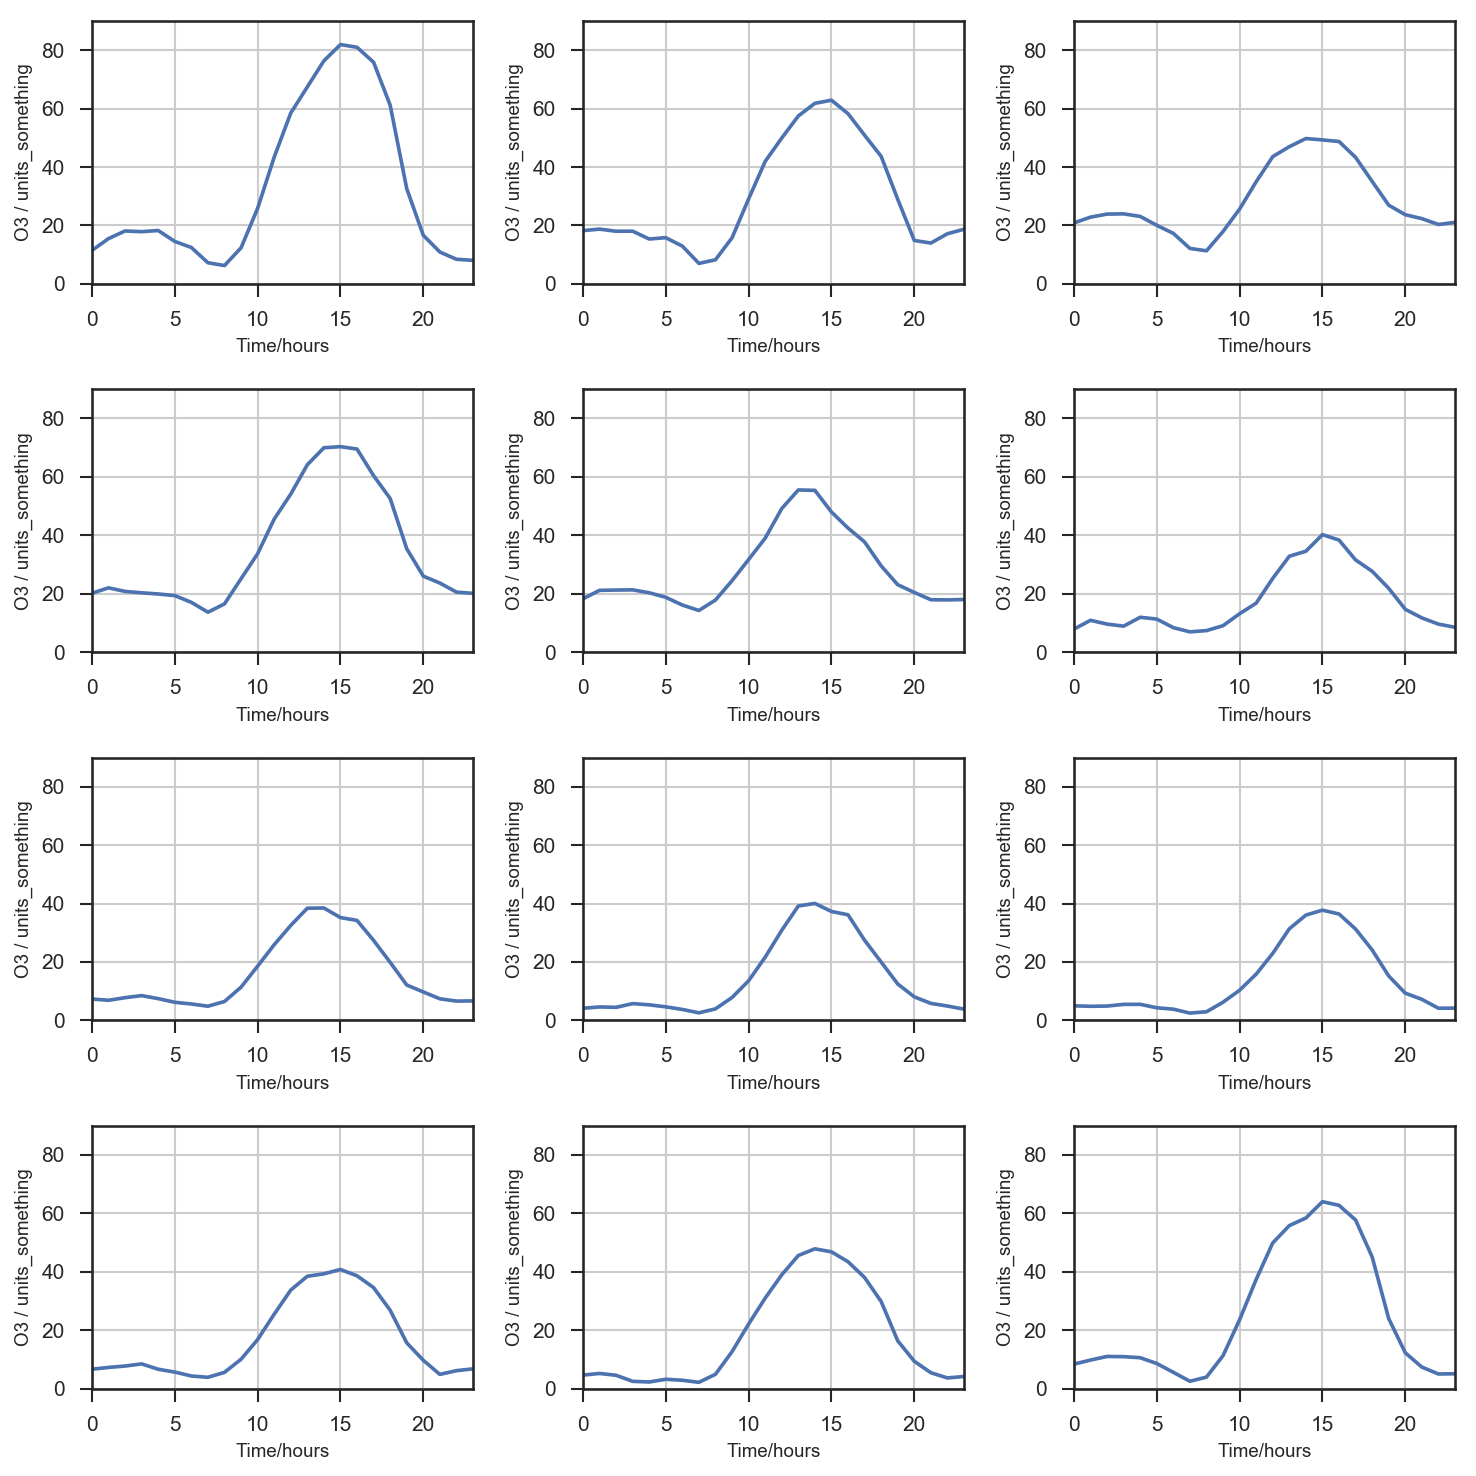

In [19]:
import datetime
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10,10), dpi=150)
counter=0
month_length=[31,28,31,30,31,30,31,31,30,31,30,31]
for ivar in range(1,13):
    # fix me 
    bkg_spr=bkg[datetime.date(year=2015,month=ivar,day=1):datetime.date(year=2015,month=ivar,day=month_length[counter])]
    bkghrlymean=bkg_spr.groupby([(bkg_spr.index.hour)]).mean()
    plot=bkghrlymean['O3'].plot(ax=axes.flat[counter], grid=True, ylim=(0,90))
    plot.set_xlabel('Time/hours', fontsize=9)
    plot.set_ylabel('O3 / units_something', fontsize=9)
    counter = counter+1
plt.tight_layout()
plt.savefig('../figures/monthly_2015_diurnal_cycles_O3.png')

In [20]:
# select based on season
# code stolen from
# https://stackoverflow.com/questions/25647546/pandas-efficient-groupby-season-for-every-year
month_num_to_season =   { 1:'DJF',  2:'DJF', 
                          3:'MAM',  4:'MAM',  5:'MAM', 
                          6:'JJA',  7:'JJA',  8:'JJA',
                          9:'SON', 10:'SON', 11:'SON',
                         12:'DJF'}
bkg_2015=bkg[datetime.date(year=2015,month=1,day=1):datetime.date(year=2015, month=12, day=31)]
grouped =  bkg_2015.groupby([lambda x: month_num_to_season.get(x.month),(bkg_2015.index.hour)]).mean() 

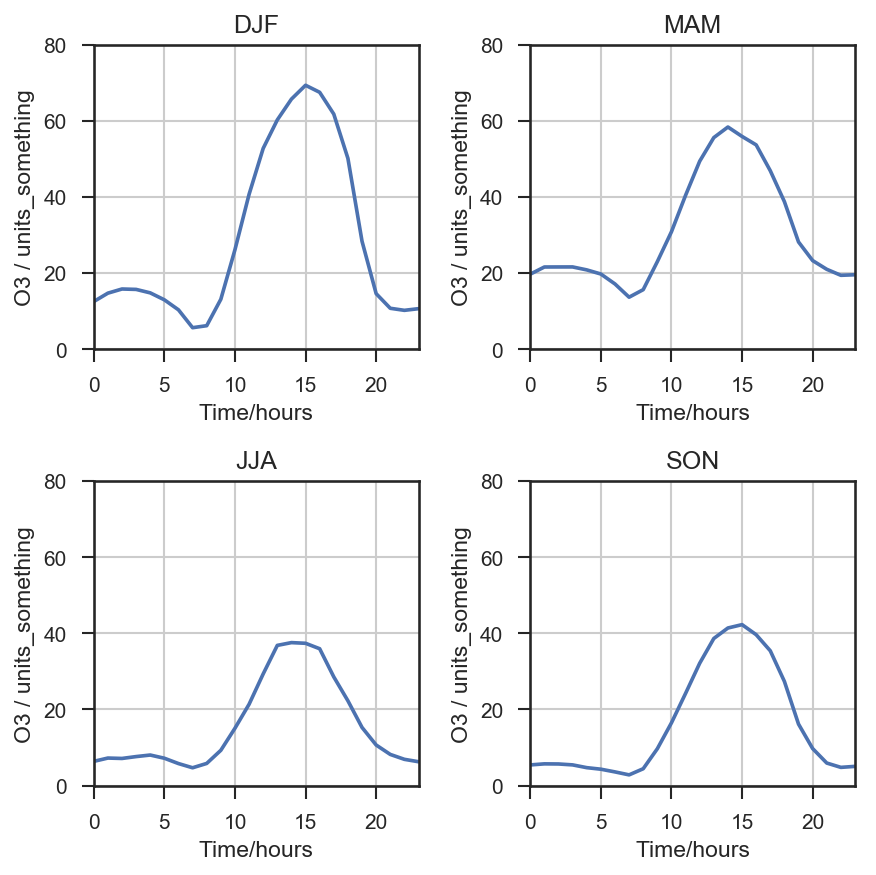

In [21]:
import datetime
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6,6), dpi=150)
counter=0
labels=['DJF','MAM','JJA','SON']
for ivar in range(1,12,3):
    # select based on value of index using loc
    # https://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-label
    bkghrlymean=grouped.loc[labels[counter]]
    # plot these data
    plot=bkghrlymean['O3'].plot(ax=axes.flat[counter], grid=True, ylim=(0,80))
    plot.set_xlabel('Time/hours')
    plot.set_ylabel('O3 / units_something')
    plot.set_title(labels[counter])
    counter = counter+1

plt.tight_layout()
plt.savefig('../figures/2015_diurnal_by_season_cycles_O3.png')